# Scikit-learnの紹介

*170613 Masahiro Rikiso*

---

* [1. データの読み込み](#1.-データの読み込み)
* [2. 学習用データの作成](#2.-学習用データの作成)
* [3. 機械学習モデルの作成](#3.-機械学習モデルの作成)
* [4. モデルの評価](#4.-モデルの評価)
* [5. モデルの保存](#5.-モデルの保存)

In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## 1. データの読み込み

`sklearn.datasets` パッケージの中に、サンプルデータが色々あります。

`load_???()` で読み込めます。

In [10]:
from sklearn.datasets import load_digits

In [11]:
digits = load_digits()

In [20]:
digits.data.shape

(1797, 64)

In [5]:
digits.images.shape

(1797, 8, 8)

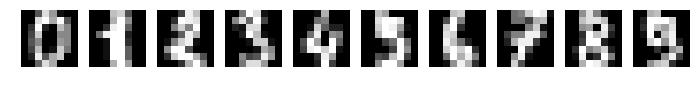

In [24]:
fig, axes = plt.subplots(ncols=10, figsize=(12,12))

for i in range(10):
    ax = axes[i]
    ax.imshow(digits.images[i], cmap='gray')
    ax.set_axis_off()

## 2. 学習用データの作成

train-test-splitをします。

ハイパーパラメータチューニングもやるときは、

train-validation-test-splitをします。

今回は、パラメータはデフォルト値を使うことにするので、

train-test-splitでいいです。

In [25]:
from sklearn.model_selection import train_test_split

In [10]:
digits.data.shape, digits.target.shape

((1797, 64), (1797,))

In [26]:
# test_sizeでtestデータとして分けておく割合を指定します。
# 今回は = 0.2にしました。　train:test = 8:2で分けることになります
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2)

In [27]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1437, 64), (360, 64), (1437,), (360,))

## 3. 機械学習モデルの作成

SVMもDTもRFも(shallow)NNも以下の同じような手順で機械学習できます。

1. モデルインスタンスの作成
2. 学習： `model.fit()`
3. 予測： `model.predict()`

#### decision tree でお試ししてみます

In [48]:
from sklearn.svm import SVC

In [49]:
clf = SVC()

In [39]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
# 1. モデルインスタンスの作成
clf = DecisionTreeClassifier()

In [50]:
# 2. 学習
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [51]:
# 3. 予測
pred = clf.predict(X_test)

In [52]:
pred

array([4, 9, 9, 9, 9, 1, 9, 0, 1, 9, 0, 9, 9, 9, 9, 9, 9, 9, 4, 6, 0, 2, 9,
       9, 2, 9, 9, 9, 4, 9, 6, 2, 9, 9, 1, 4, 2, 2, 6, 9, 2, 4, 6, 5, 9, 9,
       4, 9, 0, 7, 9, 9, 9, 6, 9, 9, 6, 2, 9, 1, 9, 9, 9, 6, 9, 8, 9, 1, 9,
       9, 9, 6, 9, 8, 9, 9, 3, 6, 6, 9, 9, 6, 9, 9, 8, 6, 9, 9, 9, 9, 9, 9,
       9, 1, 9, 9, 1, 6, 9, 4, 9, 9, 0, 9, 9, 9, 3, 2, 2, 9, 9, 2, 4, 9, 9,
       9, 9, 2, 9, 5, 4, 9, 9, 9, 0, 9, 9, 9, 9, 9, 4, 7, 0, 3, 9, 9, 9, 9,
       9, 3, 9, 9, 7, 9, 9, 9, 0, 9, 4, 9, 9, 9, 9, 9, 2, 7, 7, 9, 5, 9, 7,
       9, 9, 9, 9, 9, 9, 9, 0, 9, 9, 9, 9, 9, 9, 3, 6, 3, 9, 4, 9, 9, 0, 9,
       9, 9, 9, 9, 9, 0, 9, 9, 9, 3, 3, 9, 9, 9, 9, 9, 9, 1, 9, 9, 9, 9, 9,
       9, 9, 9, 9, 9, 9, 6, 9, 1, 9, 9, 6, 9, 9, 9, 9, 7, 1, 9, 9, 4, 9, 1,
       1, 9, 9, 9, 7, 9, 9, 9, 9, 0, 9, 9, 9, 9, 0, 0, 3, 1, 9, 6, 9, 9, 9,
       5, 9, 9, 6, 9, 9, 4, 9, 9, 1, 9, 1, 1, 9, 9, 4, 4, 9, 9, 6, 9, 9, 7,
       9, 9, 9, 9, 9, 9, 0, 9, 9, 9, 3, 9, 9, 9, 9, 3, 9, 9, 0, 7, 9, 9, 9,
       3, 2,

In [53]:
y_test

array([4, 8, 4, 0, 8, 1, 3, 0, 1, 8, 0, 9, 2, 5, 7, 1, 6, 1, 4, 6, 0, 2, 9,
       5, 2, 1, 5, 0, 4, 5, 6, 2, 5, 2, 1, 4, 2, 2, 6, 7, 2, 4, 6, 5, 4, 5,
       4, 4, 0, 7, 5, 1, 5, 6, 6, 8, 6, 2, 5, 1, 7, 3, 5, 6, 6, 8, 8, 1, 2,
       4, 9, 6, 9, 8, 2, 3, 3, 6, 6, 1, 4, 6, 5, 5, 8, 6, 6, 2, 4, 7, 1, 5,
       5, 1, 0, 7, 1, 6, 9, 4, 2, 1, 0, 9, 5, 8, 3, 2, 2, 5, 9, 2, 4, 3, 7,
       3, 0, 2, 8, 5, 4, 3, 7, 6, 0, 8, 3, 3, 2, 0, 4, 7, 0, 3, 2, 3, 0, 5,
       5, 3, 9, 9, 7, 7, 4, 4, 0, 3, 4, 5, 0, 8, 1, 9, 2, 7, 7, 3, 5, 5, 7,
       7, 7, 6, 9, 9, 9, 7, 0, 5, 1, 3, 9, 8, 7, 3, 6, 3, 7, 4, 9, 1, 0, 0,
       9, 8, 4, 1, 1, 0, 5, 9, 2, 3, 3, 5, 8, 3, 1, 8, 1, 1, 5, 3, 2, 2, 2,
       2, 4, 3, 9, 4, 2, 6, 8, 1, 1, 2, 6, 3, 7, 5, 4, 7, 1, 6, 8, 4, 5, 1,
       1, 9, 5, 9, 7, 0, 8, 2, 7, 0, 0, 4, 8, 5, 0, 0, 3, 1, 9, 6, 5, 5, 1,
       5, 5, 0, 6, 4, 1, 4, 7, 9, 1, 2, 1, 1, 7, 8, 4, 4, 7, 8, 6, 2, 8, 7,
       6, 2, 3, 8, 8, 1, 0, 9, 9, 9, 3, 8, 6, 4, 5, 3, 2, 3, 0, 7, 2, 2, 0,
       3, 2,

In [54]:
pred.shape , y_test.shape

((360,), (360,))

## 4. モデルの評価

`accuracy_score()`っていう便利な関数を使えば、正答率が評価できます。

In [55]:
from sklearn.metrics import accuracy_score

In [56]:
accuracy_score(y_test, pred)

0.46111111111111114

#### ちなみに

愚直にやってもできます。

In [58]:
is_equal = np.equal(pred, y_test)
is_equal

array([ True, False, False, False, False,  True, False,  True,  True,
       False,  True,  True, False, False, False, False, False, False,
        True,  True,  True,  True,  True, False,  True, False, False,
       False,  True, False,  True,  True, False, False,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True, False,
       False,  True, False,  True,  True, False, False, False,  True,
       False, False,  True,  True, False,  True, False, False, False,
        True, False,  True, False,  True, False, False,  True,  True,
        True,  True, False, False,  True,  True,  True, False, False,
        True, False, False,  True,  True, False, False, False, False,
       False, False, False,  True, False, False,  True,  True,  True,
        True, False, False,  True,  True, False, False,  True,  True,
        True, False,  True,  True,  True, False, False, False, False,
        True, False,  True,  True, False, False, False,  True, False,
       False, False,

In [59]:
is_equal = is_equal.astype('float')
is_equal

array([ 1.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  1.,  0.,  1.,  1.,  0.,
        0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  0.,
        0.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,
        0.,  1.,  1.,  1.,  1.,  0.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,
        0.,  1.,  0.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,
        1.,  0.,  1.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,  1.,  1.,
        1.,  0.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  1.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,  1.,  1.,
        0.,  0.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,
        1.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
        1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,
        0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,
        1.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,  1.,
        0.,  0.,  0.,  1.,  0.,  0.,  1.,  1.,  1.,  0.,  1.,  1

In [60]:
np.mean(is_equal)

0.46111111111111114

## 5. モデルの保存

joblibを使います。`model.pkl`という名前で保存します。

In [62]:
from sklearn.externals import joblib
joblib.dump(clf, 'svm.model')

['svm.model']

別ファイルから読み込みたいときは、以下の2行で読み込めます

In [25]:
from sklearn.externals import joblib
clf = joblib.load('model.pkl') 

#pred = clf.predict(new_data)

モデルにディープニューラルネットを使って、同じようにモデルを学習&保存して作ったのが[こんなアプリ](http://ec2-52-10-25-30.us-west-2.compute.amazonaws.com)です。詳細はまた紹介します。